# Image Classification with CNN for CIFAR_10 Data
* Bu projede CIFAR-10 Resimleri CNN kullanılarak sınıflandırılacaktır

In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
import matplotlib.pyplot as plt

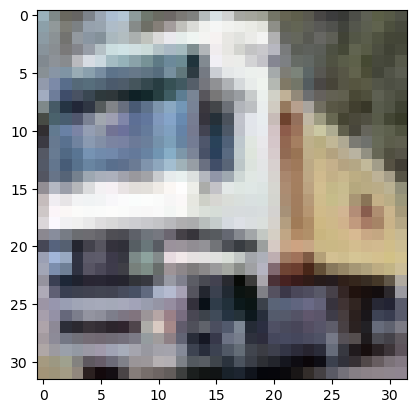

In [5]:
plt.imshow(x_train[1])

In [6]:
# Resimleri gri tonlama yapalım
import numpy as np

In [7]:
x_train = np.mean(x_train, axis=3)
x_train.shape
# Gri tonlama denedim çok başarılı olmadı

(50000, 32, 32)

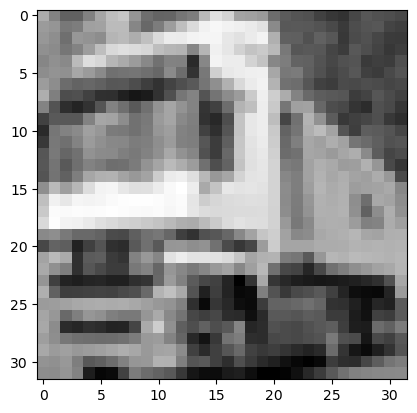

In [8]:
plt.imshow(x_train[1], cmap="gray")

In [9]:
x_test = np.mean(x_test, axis=3)
x_test.shape
# Gri tonlama denedim çok başarılı olmadı

(10000, 32, 32)

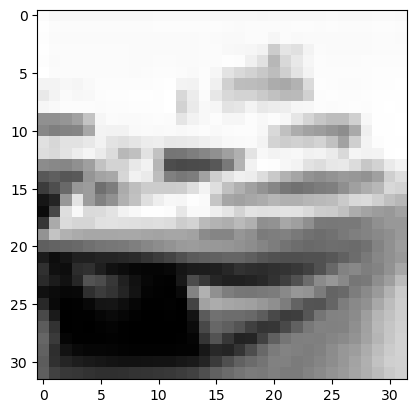

In [10]:
plt.imshow(x_test[1], cmap="gray")

### Normalize Data

In [11]:
x_train=x_train/255.0
x_test=x_test/255.0

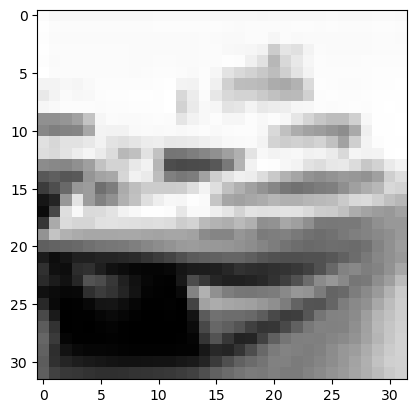

In [12]:
plt.imshow(x_test[1], cmap="gray")

## Convolutional Neural Networks - CNNs
* Image Classification

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [14]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [34]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1))) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))

model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [35]:
history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_split=0.1, verbose=1)

Epoch 1/30
704/704 [==============================] - 100s 140ms/step - loss: 1.6910 - accuracy: 0.4450 - val_loss: 1.2958 - val_accuracy: 0.5456
Epoch 2/30
704/704 [==============================] - 94s 133ms/step - loss: 1.1130 - accuracy: 0.6123 - val_loss: 1.7354 - val_accuracy: 0.4834
Epoch 3/30
704/704 [==============================] - 93s 133ms/step - loss: 0.9551 - accuracy: 0.6681 - val_loss: 0.9044 - val_accuracy: 0.6846
Epoch 4/30
704/704 [==============================] - 95s 135ms/step - loss: 0.8678 - accuracy: 0.6975 - val_loss: 1.2335 - val_accuracy: 0.6092
Epoch 5/30
704/704 [==============================] - 93s 132ms/step - loss: 0.7993 - accuracy: 0.7211 - val_loss: 1.0998 - val_accuracy: 0.6338
Epoch 6/30
704/704 [==============================] - 92s 131ms/step - loss: 0.7281 - accuracy: 0.7438 - val_loss: 0.9575 - val_accuracy: 0.6828
Epoch 7/30
704/704 [==============================] - 93s 132ms/step - loss: 0.6823 - accuracy: 0.7627 - val_loss: 0.7486 - val_a

In [36]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.7137 - accuracy: 0.7956


In [37]:
accuracy

0.7955999970436096

In [38]:
import matplotlib.pyplot as plt

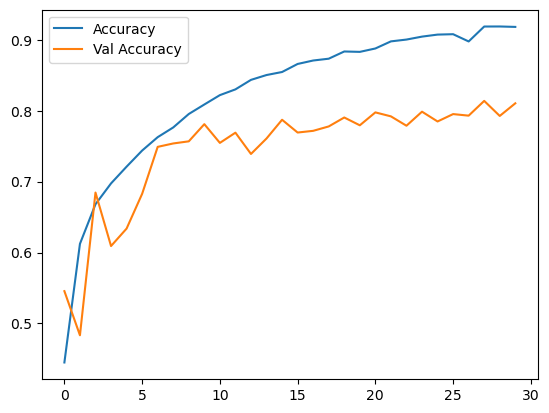

In [39]:
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()

In [40]:
pred = model.predict(x_test)

313/313 [==============================] - 5s 14ms/step


In [41]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [42]:
confusion_matrix(y_test, np.argmax(pred, axis=1))

array([[843,  13,  42,  13,  13,   4,  10,  10,  32,  20],
       [  9, 927,   3,   8,   1,   3,   7,   2,   8,  32],
       [ 72,   3, 672,  46,  84,  56,  50,   9,   6,   2],
       [ 36,   6,  55, 617,  40, 146,  70,  20,   6,   4],
       [ 19,   5,  57,  53, 746,  40,  36,  38,   5,   1],
       [ 15,   2,  33, 122,  24, 752,  30,  18,   2,   2],
       [ 15,   5,  28,  37,  10,  19, 879,   1,   3,   3],
       [ 13,   4,  38,  37,  32,  51,   5, 808,   5,   7],
       [ 63,  23,  11,  10,   5,   5,   9,   4, 858,  12],
       [ 18,  66,   3,  11,   5,   6,   9,   9,  19, 854]], dtype=int64)

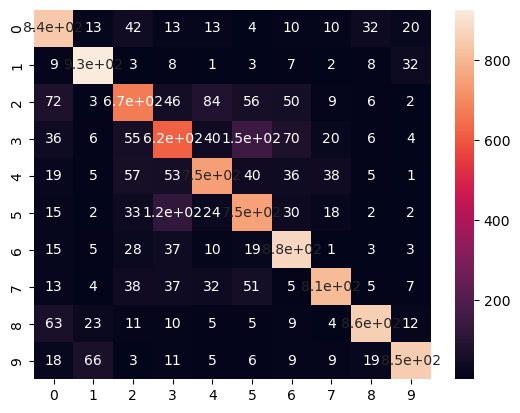

In [44]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, np.argmax(pred, axis=1)), annot=True);

In [45]:
print(classification_report(y_test, np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1000
           1       0.88      0.93      0.90      1000
           2       0.71      0.67      0.69      1000
           3       0.65      0.62      0.63      1000
           4       0.78      0.75      0.76      1000
           5       0.70      0.75      0.72      1000
           6       0.80      0.88      0.84      1000
           7       0.88      0.81      0.84      1000
           8       0.91      0.86      0.88      1000
           9       0.91      0.85      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



## Sonuç

Bu projede `tensorflow` kütüphanesi bünyesinde mevcut olan hazır veri setlerinden biri olan `CIFAR 10` resimleri ile sınıflandırma modeli geliştirilmiştir.